# Mean-shift Clustering Technique

Mean-shift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

Given a candidate centroid $x_i$ for iteration $t$, the candidate is updated according to the following equation:

$$x_i^{t+1} = x_i^t + m(x_i^t)$$

Where $N(x_i)$ is the neighborhood of samples within a given distance around $x_i$ and $m$ is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points. This is computed using the following equation, effectively updating a centroid to be the mean of the samples within its neighborhood:

$$m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}$$

**The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through**. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

**The algorithm is not highly scalable, as it requires multiple nearest neighbor searches** during the execution of the algorithm. The algorithm is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.

## Make the synthetic data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cluster import MeanShift
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.4, random_state=101)

In [3]:
X.shape

(300, 2)

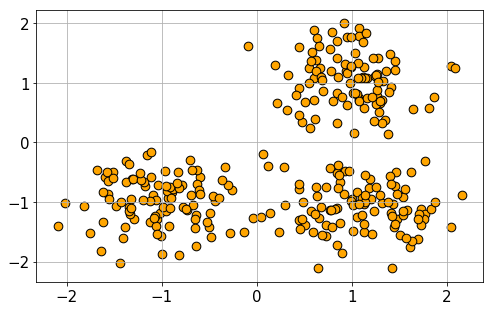

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1],edgecolors='k', c='orange', s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Clustering

In [8]:
ms_model = MeanShift()
ms_model.fit(X)
cluster_centers = ms_model.cluster_centers_
labels = ms_model.labels_
n_clusters = len(cluster_centers)
labels = ms_model.labels_

#### Number of detected clusters and their centers

In [10]:
print(f'Number of clusters detected by the algorithm:', n_clusters)

Number of clusters detected by the algorithm: 3


In [11]:
print(f'Cluster centers detected at:\n\n', cluster_centers)

Cluster centers detected at:

 [[ 1.09954715 -1.09294823]
 [ 0.9931698   1.05074234]
 [-0.99420039 -0.96765319]]


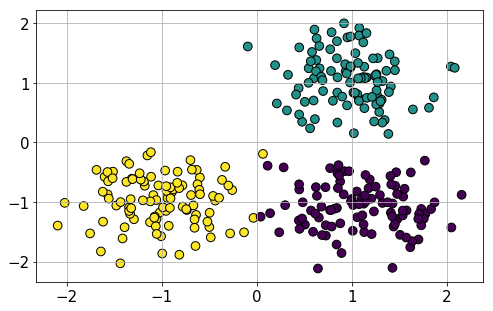

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:,0], X[:,1], edgecolors='k', c=ms_model.labels_, s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Evaluation of model

#### Homogeneity

Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [14]:
print ('Homogeneity score:', metrics.homogeneity_score(labels_true, labels))

Homogeneity score: 0.9405073022327171


#### Completeness

Completeness metric of a cluster labeling given a ground truth.

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [16]:
print('Completeness score:' ,metrics.completeness_score(labels_true, labels))

Completeness score: 0.9405073022327171


## Time complexity and model quality as the data size grows

In [18]:
import time
from tqdm import tqdm 

In [19]:
n_samples = [10, 20, 50, 100, 200, 500, 1000, 2000, 3000, 5000, 7500, 10000]
centers = [[1, 1], [-1, -1], [1, -1]]
t_ms = []
homo_ms = []
complete_ms = []

for i in tqdm(n_samples):
    X,labels_true = make_blobs(n_samples=i, centers=centers, cluster_std=0.4,random_state=101)
    t1 = time.time()
    ms_model = MeanShift().fit(X)
    t2=time.time()
    t_ms.append(t2-t1)
    homo_ms.append(metrics.homogeneity_score(labels_true,ms_model.labels_))
    complete_ms.append(metrics.completeness_score(labels_true,ms_model.labels_))

100%|██████████| 12/12 [01:12<00:00,  6.08s/it]


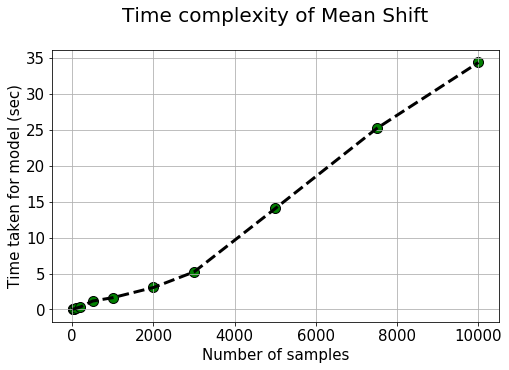

In [13]:
plt.figure(figsize=(8, 5))
plt.title('Time complexity of Mean Shift\n' fontsize=20)
plt.scatter(n_samples, t_ms, edgecolors='k', c='green', s=100)
plt.plot(n_samples, t_ms, 'k--', lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel('Number of samples', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Time taken for model (sec)', fontsize=15)
plt.show()

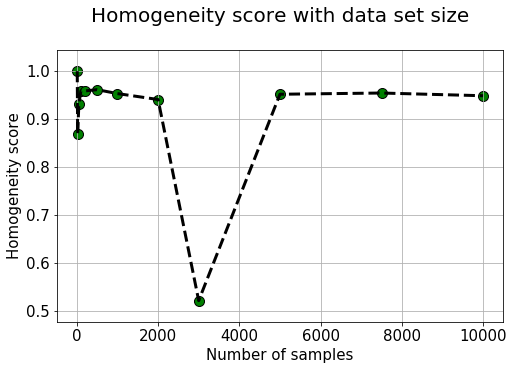

In [14]:
plt.figure(figsize=(8,5))
plt.title("Homogeneity score with data set size\n",fontsize=20)
plt.scatter(n_samples,homo_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,homo_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Homogeneity score",fontsize=15)
plt.show()

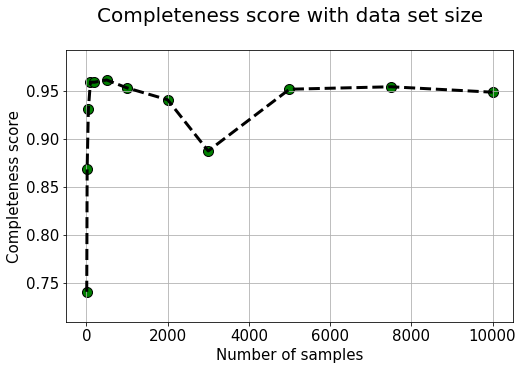

In [15]:
plt.figure(figsize=(8,5))
plt.title("Completeness score with data set size\n",fontsize=20)
plt.scatter(n_samples,complete_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,complete_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Completeness score",fontsize=15)
plt.show()

## How well the cluster detection works in the presence of noise?

Create data sets with varying degree of noise std. dev and run the model to detect clusters.

In [16]:
noise = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.25,1.5,1.75,2.0]
n_clusters = []
for i in noise:
    centers = [[1, 1], [-1, -1], [1, -1]]
    X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=i,random_state=101)
    ms_model=MeanShift().fit(X)
    n_clusters.append(len(ms_model.cluster_centers_))

Detected number of clusters: [3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


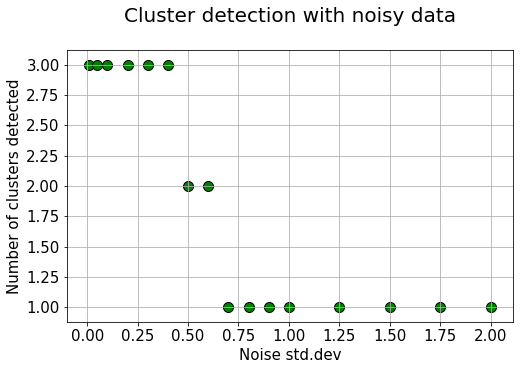

In [17]:
print("Detected number of clusters:",n_clusters)
plt.figure(figsize=(8,5))
plt.title("Cluster detection with noisy data\n",fontsize=20)
plt.scatter(noise,n_clusters,edgecolors='k',c='green',s=100)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Noise std.dev",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of clusters detected",fontsize=15)
plt.show()

** We see that the cluster detection works well up to a certain level of noise std. dev, after which the mean of the blobs shifts to the overall centroid and the number of detected clusters tends to 1**